<a href="https://colab.research.google.com/github/vmavis/colab/blob/main/wind_speed_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

We import the data set from our device.

In [ ]:
# !pip install kaggle
from google.colab import files
files.upload()

Saving wind_dataset.csv to wind_dataset (2).csv


{'wind_dataset.csv': b'"DATE","WIND","IND","RAIN","IND.1","T.MAX","IND.2","T.MIN","T.MIN.G"\r\n1961-01-01,13.67,"0",0.2,"0",9.5,"0",3.7,-1\r\n1961-01-02,11.5,"0",5.1,"0",7.2,"0",4.2,1.1\r\n1961-01-03,11.25,"0",0.4,"0",5.5,"0",0.5,-0.5\r\n1961-01-04,8.63,"0",0.2,"0",5.6,"0",0.4,-3.2\r\n1961-01-05,11.92,"0",10.4,"0",7.2,"1",-1.5,-7.5\r\n1961-01-06,10.67,"0",0,"0",6.5,"0",1.2,-2\r\n1961-01-07,9.17,"0",1.9,"0",9.2,"1",-2.4,-7.1\r\n1961-01-08,14.29,"0",0,"0",6.6,"0",3.1,0\r\n1961-01-09,8.04,"0",8.3,"0",6.8,"0",2.4,-0.8\r\n1961-01-10,11.42,"0",0,"0",6.5,"0",3,0.5\r\n1961-01-11,7.54,"0",0.5,"0",10,"1",-3.1,-7.7\r\n1961-01-12,15.54,"0",6,"0",12.2,"1",-3.3,NA\r\n1961-01-13,4.63,"0",0,"0",13.1,"0",5.5,3.3\r\n1961-01-14,3.08,"0",0,"0",5.6,"1",-3.2,-6.1\r\n1961-01-15,2.5,"0",0,"0",4.4,"1",-5,-8.3\r\n1961-01-16,9.25,"0",0,"0",4.6,"1",-4.2,-8.3\r\n1961-01-17,13.42,"0",2,"0",9.3,"0",3.2,-2.7\r\n1961-01-18,17.83,"0",8.4,"0",10.1,"0",4.3,5.1\r\n1961-01-19,3.71,"0",0.9,"0",6.6,"0",1.6,-2\r\n1961-01-20,3

We assign the data set to a variable and see the first few rows to check if we have imported the correct data set.

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('wind_dataset.csv')
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


We remove all columns that we won't be using in our model. We then see the first few rows of our new dataframe.

In [ ]:
df = data.drop(data.columns[[0,2,4,6,8]], axis=1)
df.head()

,WIND,RAIN,T.MAX,T.MIN
0,13.67,0.2,9.5,3.7
1,11.50,5.1,7.2,4.2
2,11.25,0.4,5.5,0.5
3,8.63,0.2,5.6,0.4
4,11.92,10.4,7.2,-1.5


We check the proportion of the null values.

In [ ]:
df.isnull().sum()/len(df)

WIND     0.000000
RAIN     0.000000
T.MAX    0.094463
T.MIN    0.102525
dtype: float64

We remove all the null values as there are only a few, so we do not need to replace them with mean, average, etc.

In [ ]:
df = df.dropna()
df.isnull().sum()/len(df)

WIND     0.0
RAIN     0.0
T.MAX    0.0
T.MIN    0.0
dtype: float64

We see the histograms of each column to see if our data comes from a normal distribution.

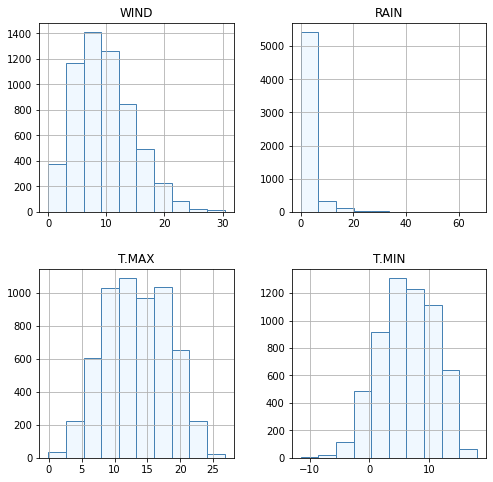

In [ ]:
import matplotlib.pyplot as plt
plotdata = df[['WIND', 'RAIN', 'T.MAX', 'T.MIN']]
plotdata.hist(figsize=(8,8), color='aliceblue', edgecolor='steelblue')
plt.show()

We check if our data has any outlier using boxplot.

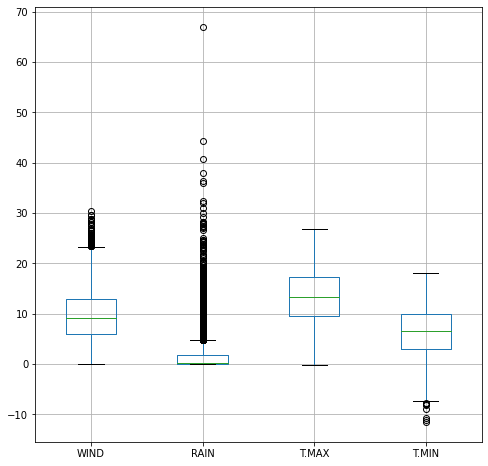

In [ ]:
plotdata.boxplot(figsize=(8,8))

We check the correlation between each column using heatmap. We can see that only T.MAX and T.MIN have a high correlation.

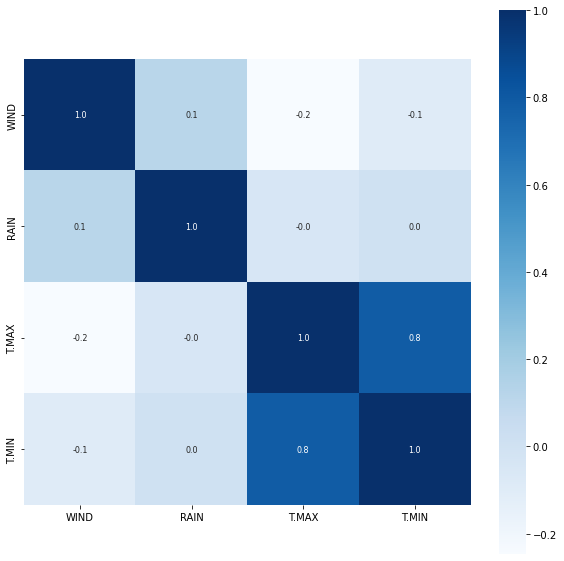

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# **Training, Validation, and Testing Set**

We take a number of samples to make our code run faster. We assign all the predictor variables to 'x' and the predicted variable to 'y'. We then scale our data using StandardScaler as they have different scales (units).

In [ ]:
df = df.sample(n=300, random_state=42)
x = df.iloc[:,1:]
y = df.iloc[:,0]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(np.expand_dims(y, axis=1))

We check the number of rows and columns of our new variables.

In [ ]:
x.shape, y.shape

((300, 3), (300, 1))

We create a function to work with DataLoader.

In [ ]:
import torch
from torch.utils.data import Dataset

class Dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, index):
    x = torch.Tensor(self.x[index])
    y = torch.Tensor(self.y[index])

    return x, y

  def __len__(self):
    return len(self.x)

We split the data into training, validation, and testing sets. Each has a proportion of 80%, 10%, and 10%.

In [ ]:
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2)
testx, validx, testy, validy = train_test_split(testx, testy, test_size=0.5)
trainx.shape, trainy.shape, testx.shape, testy.shape, validx.shape, validy.shape

((240, 3), (240, 1), (30, 3), (30, 1), (30, 3), (30, 1))

We assign each training, validation, and testing variables to different data sets. We use DataLoader to create batch sizes and shuffle the data.

In [ ]:
from torch.utils.data import DataLoader

train_ds = Dataset(trainx, trainy)
train_loader = DataLoader(train_ds, batch_size=30, shuffle=True, num_workers=0)

valid_ds = Dataset(validx, validy)
valid_loader = DataLoader(valid_ds, batch_size=30, shuffle=False, num_workers=0)

test_ds = Dataset(testx, testy)
test_loader = DataLoader(test_ds, batch_size=30, shuffle=False, num_workers=0)

# **Backpropagation Neural Network**

We create a neural network architecture to train our model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        #Input Layer
        self.fc1 = nn.Linear(3, 15)
        self.bn1 = nn.BatchNorm1d(15)
        #Hidden Layer
        self.fc2 = nn.Linear(15, 30)
        self.bn2 = nn.BatchNorm1d(30)
        #Output Layer
        self.fc3 = nn.Linear(30, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.fc3(x)

        return x

We create a variable to define our neural network, loss function, and optimizer.

In [ ]:
net1 = Net1()
criterion1 = nn.L1Loss()
optimizer1 = torch.optim.SGD(net1.parameters(), lr=0.01)

We train our data and set our epoch to 30. We then check our training and validation loss.

In [ ]:
epochs = 30

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):
    train_losses = []
    valid_losses = []

    print("\n")
    print("Epoch {}".format(i))

    for j, batch_data in enumerate(train_loader):
        x_batch, y_batch = batch_data

        optimizer1.zero_grad()

        out = net1(x_batch)
        loss = criterion1(out, y_batch.squeeze())

        loss.backward()
        optimizer1.step()

        train_losses.append(loss)

    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))

    train_mean_losses.append(train_mean_loss)

    with torch.set_grad_enabled(False):
        for j, batch_data in enumerate(valid_loader):
            x_batch, y_batch = batch_data

            out = net1(x_batch)
            loss = criterion1(out, y_batch.squeeze())
            valid_losses.append(loss)

        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))

        valid_mean_losses.append(valid_mean_loss)

        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net1.state_dict(), "best_model.pth")



Epoch 0
training loss: 0.93269539
validation loss: 0.95233500


Epoch 1
training loss: 0.86056435
validation loss: 0.92998195


Epoch 2
training loss: 0.84166425
validation loss: 0.91768610


Epoch 3
training loss: 0.82378823
validation loss: 0.91208518


Epoch 4
training loss: 0.82022887
validation loss: 0.90897661


Epoch 5
training loss: 0.81530684
validation loss: 0.90717888


Epoch 6
training loss: 0.81334651
validation loss: 0.90654731


Epoch 7
training loss: 0.81384242
validation loss: 0.90604275


Epoch 8
training loss: 0.81365383
validation loss: 0.90560770


Epoch 9
training loss: 0.81344771
validation loss: 0.90570414


Epoch 10
training loss: 0.81081468
validation loss: 0.90534598


Epoch 11
training loss: 0.81133717
validation loss: 0.90505862




/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 12
training loss: 0.81152648
validation loss: 0.90515846


Epoch 13
training loss: 0.80988348
validation loss: 0.90507191


Epoch 14
training loss: 0.80841053
validation loss: 0.90505934


Epoch 15
training loss: 0.80875933
validation loss: 0.90502632


Epoch 16
training loss: 0.80865771
validation loss: 0.90527165


Epoch 17
training loss: 0.80976713
validation loss: 0.90505451


Epoch 18
training loss: 0.80854666
validation loss: 0.90506476


Epoch 19
training loss: 0.80883676
validation loss: 0.90486741


Epoch 20
training loss: 0.80955732
validation loss: 0.90497673


Epoch 21
training loss: 0.80829829
validation loss: 0.90510637


Epoch 22
training loss: 0.80669075
validation loss: 0.90491986


Epoch 23
training loss: 0.80725503
validation loss: 0.90513575


Epoch 24
training loss: 0.80767822
validation loss: 0.90511662


Epoch 25
training loss: 0.80698723
validation loss: 0.90520304


Epoch 26
training loss: 0.80653667
validation loss: 0.90527791


Epoch 27
training loss: 0

We plot our training and validation loss.

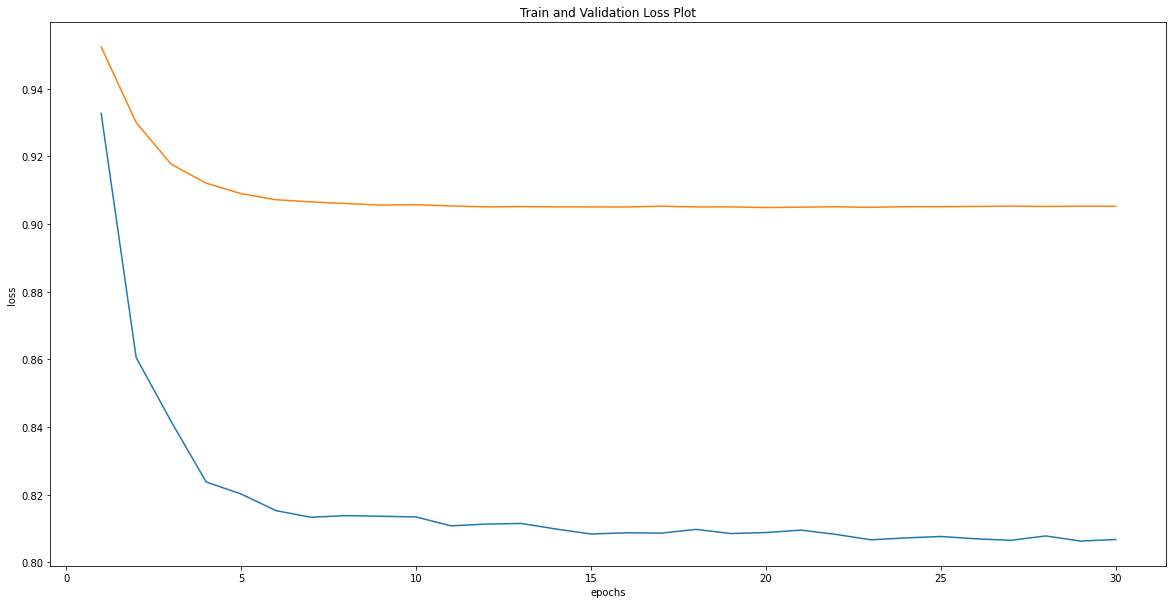

1 0.9326953887939453


In [ ]:
plt.figure(figsize=(20,10))
t = [i.item() for i in train_mean_losses]
plt.plot(range(1,epochs+1), t)
v = [j.item() for j in valid_mean_losses]
plt.plot(range(1,epochs+1), v)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Validation Loss Plot')
plt.show()
max_y = max(t)
max_x = range(1,epochs+1)[t.index(max_y)]
print(max_x, max_y)

# **Architecture Modifications**

We create a new neural network architecture with a few modifications to train our model.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        #Input Layer
        self.fc1 = nn.Linear(3, 30)
        self.bn1 = nn.BatchNorm1d(30)
        #Hidden Layer
        self.fc2 = nn.Linear(30, 30)
        self.bn2 = nn.BatchNorm1d(30)
        #Output Layer
        self.fc3 = nn.Linear(30, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.bn2(x)
        x = self.fc3(x)

        return x

We create a variable to define our neural network, loss function, and optimizer.

In [ ]:
net2 = Net2()
criterion2 = nn.MSELoss()
optimizer2 = torch.optim.SGD(net2.parameters(), lr=0.1)

We train our data and increase our epoch to 50. We then check our training and validation loss.

In [ ]:
epochs = 50

train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):
    train_losses = []
    valid_losses = []

    print("\n")
    print("Epoch {}".format(i))

    for j, batch_data in enumerate(train_loader):
        x_batch, y_batch = batch_data

        optimizer2.zero_grad()

        out = net2(x_batch)
        loss = criterion2(out, y_batch.squeeze())

        loss.backward()
        optimizer2.step()

        train_losses.append(loss)

    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))

    train_mean_losses.append(train_mean_loss)

    with torch.set_grad_enabled(False):
        for j, batch_data in enumerate(valid_loader):
            x_batch, y_batch = batch_data

            out = net2(x_batch)
            loss = criterion2(out, y_batch.squeeze())
            valid_losses.append(loss)

        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))

        valid_mean_losses.append(valid_mean_loss)

        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net2.state_dict(), "best_model.pth")



Epoch 0
training loss: 1.43069792
validation loss: 1.28686011


Epoch 1
training loss: 0.98966795
validation loss: 1.13268983


Epoch 2
training loss: 0.96189839
validation loss: 1.12822855


Epoch 3
training loss: 0.95899612
validation loss: 1.13288653


Epoch 4
training loss: 0.95713156
validation loss: 1.13129711


Epoch 5
training loss: 0.95944357
validation loss: 1.13454497


Epoch 6
training loss: 0.96180224
validation loss: 1.14224482


Epoch 7
training loss: 0.95509136
validation loss: 1.14585221


Epoch 8
training loss: 0.95532852
validation loss: 1.13447082


Epoch 9
training loss: 0.95653838
validation loss: 1.13305235


Epoch 10
training loss: 0.95855498
validation loss: 1.13713098


Epoch 11
training loss: 0.95420933
validation loss: 1.12429237


Epoch 12
training loss: 0.95791364


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([30])) that is different to the input size (torch.Size([30, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


validation loss: 1.12701273


Epoch 13
training loss: 0.95353460
validation loss: 1.12956107


Epoch 14
training loss: 0.95467854
validation loss: 1.13632894


Epoch 15
training loss: 0.95398951
validation loss: 1.13773680


Epoch 16
training loss: 0.95516729
validation loss: 1.12415671


Epoch 17
training loss: 0.96249032
validation loss: 1.13085485


Epoch 18
training loss: 0.95358849
validation loss: 1.12651813


Epoch 19
training loss: 0.95389289
validation loss: 1.12502599


Epoch 20
training loss: 0.95276368
validation loss: 1.15269589


Epoch 21
training loss: 0.95968062
validation loss: 1.12735486


Epoch 22
training loss: 0.95629805
validation loss: 1.13732994


Epoch 23
training loss: 0.95791614
validation loss: 1.12748528


Epoch 24
training loss: 0.96210659
validation loss: 1.13453650


Epoch 25
training loss: 0.95542103
validation loss: 1.13190579


Epoch 26
training loss: 0.96236974
validation loss: 1.12411082


Epoch 27
training loss: 0.95330900
validation loss: 1.132135

We plot our training and validation loss.

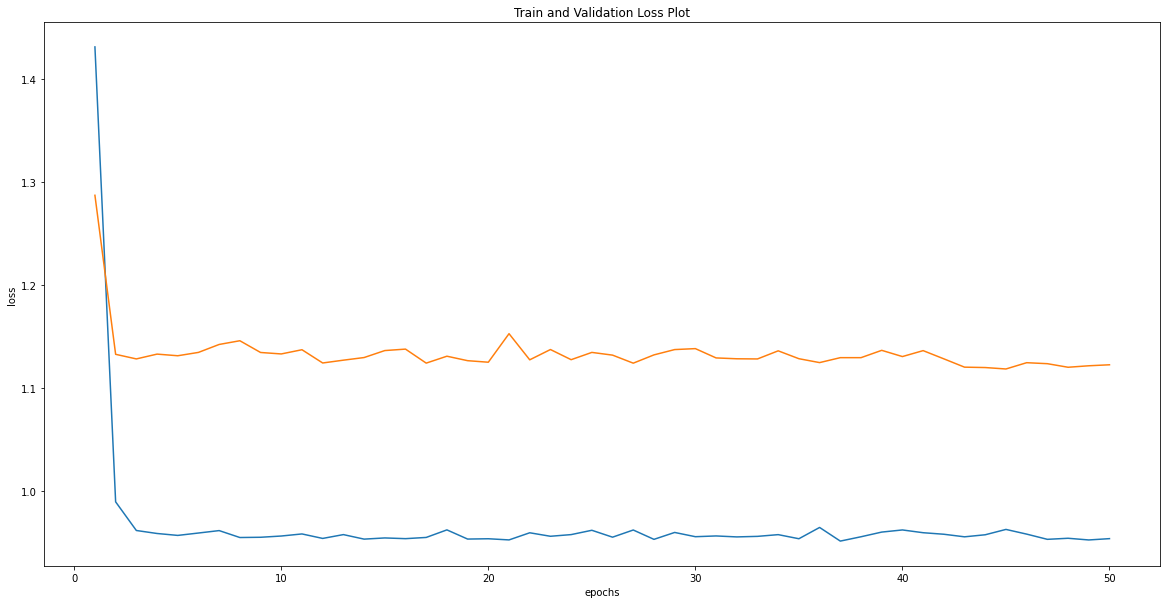

1 1.4306979179382324


In [ ]:
plt.figure(figsize=(20,10))
t = [i.item() for i in train_mean_losses]
plt.plot(range(1,epochs+1), t)
v = [j.item() for j in valid_mean_losses]
plt.plot(range(1,epochs+1), v)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Validation Loss Plot')
plt.show()
max_y = max(t)
max_x = range(1,epochs+1)[t.index(max_y)]
print(max_x, max_y)

# **Accuracy and Model Comparison**

We compute the accuracy of the first model using MSE and R Squared.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_pred = np.empty((0,1))
with torch.no_grad():
    for i, batch_data in enumerate(test_loader):
        x_batch, y_batch = batch_data
        out = net1(x_batch)
        test_pred = np.append(test_pred, out.numpy(), axis=0)

test_pred = np.array(test_pred)
test_pred = scaler.inverse_transform(test_pred)

test_gt = scaler.inverse_transform(testy)

mse1 = mean_squared_error(test_gt, test_pred)
r21 = r2_score(test_gt, test_pred)

mse1, r21

(32.749764666116576, 0.013960964546504528)

We compute the accuracy of the second model also using MSE and R Squared.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

test_pred = np.empty((0,1))
with torch.no_grad():
    for i, batch_data in enumerate(test_loader):
        x_batch, y_batch = batch_data
        out = net2(x_batch)
        test_pred = np.append(test_pred, out.numpy(), axis=0)

test_pred = np.array(test_pred)
test_pred = scaler.inverse_transform(test_pred)

test_gt = scaler.inverse_transform(testy)

mse2 = mean_squared_error(test_gt, test_pred)
r22 = r2_score(test_gt, test_pred)

mse2, r22

(34.02723953631466, -0.02450160462515849)

We create a simple dataframe to compare the accuracy metrics of each model.

In [ ]:
model1 = [mse1, r21]
model2 = [mse2, r22]
score = {'Model 1': model1, 'Model 2': model2}
score_df = pd.DataFrame(score, index=['MSE', 'R Squared'])
score_df

,Model 1,Model 2
MSE,32.749765,34.027240
R Squared,0.013961,-0.024502


From the displayed results, we can see that the first model has a lower MSE and higher R Squared value, meaning the first model is better in predicting wind speed compared to the second model.